In [129]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [130]:
column_names = ["TP_ANO_CONCLUIU","TP_ESCOLA","IN_TREINEIRO","label"]

In [131]:
test = pd.read_csv("dadosFiltrado.csv", usecols = column_names)

In [132]:
test.tail()

,IN_TREINEIRO,TP_ANO_CONCLUIU,TP_ESCOLA,label
49994,0,5,1,1
49995,0,0,3,1
49996,0,1,1,1
49997,0,3,1,1
49998,0,0,1,1


In [133]:
    # Seperating the target variable 
    X = test.values[:, 0:2] 
    y = test.values[:, 3] 

In [142]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000) # 70% training and 30% test

In [143]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [144]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7173


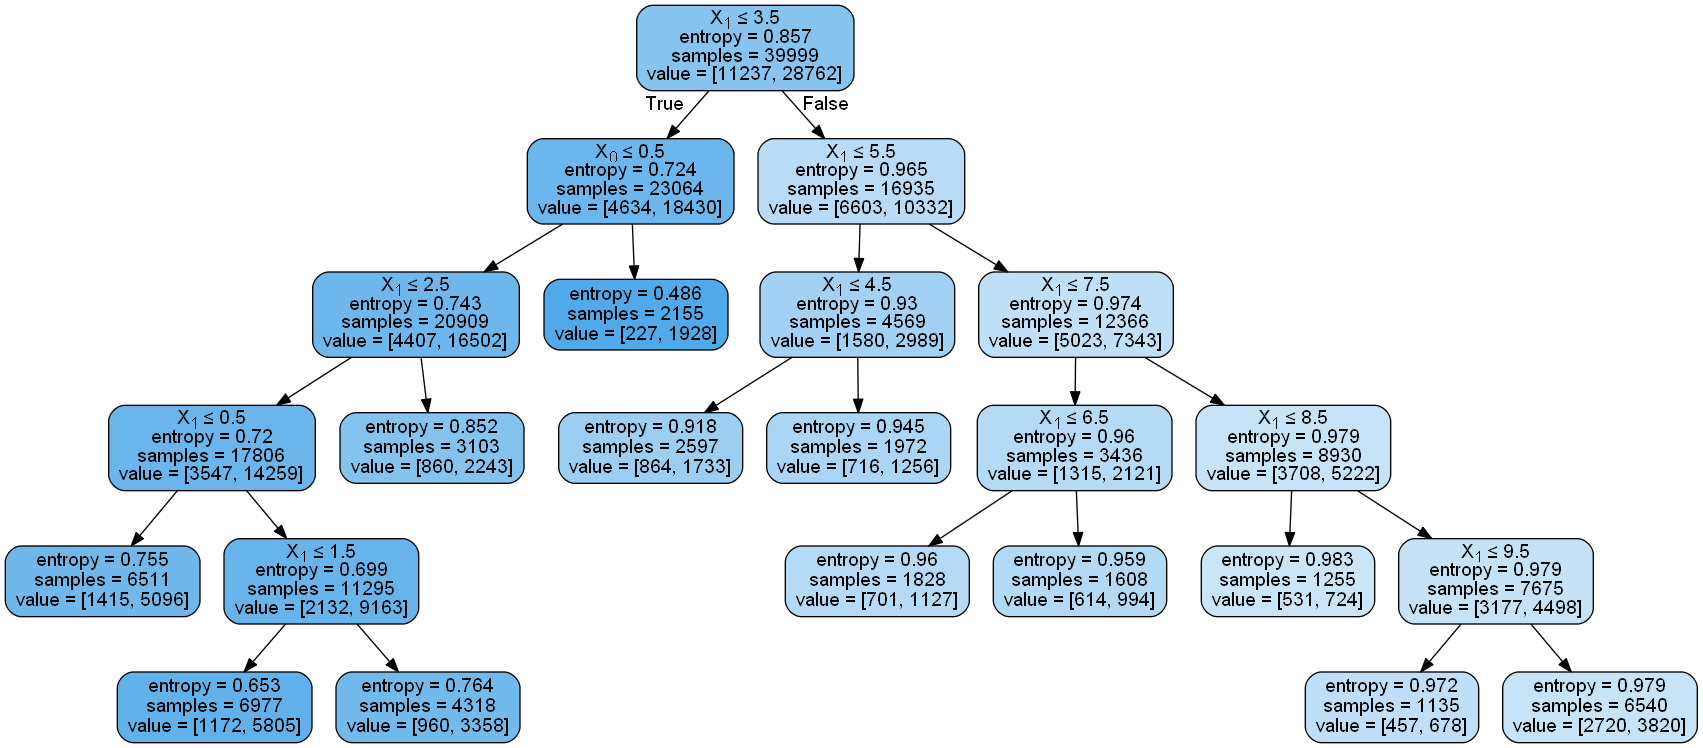

In [151]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())